In [1]:
###############################
# 분류 CNN 모델링
###############################
import tensorflow.keras as keras
from tensorflow.keras import models, layers

def CNN(W,H,C , Nout):
        model = models.Sequential()
        model.add(layers.Conv2D(32, kernel_size=(3, 3),
                               activation="relu",
                               input_shape=(W,H,C)))
        model.add(layers.Conv2D(64,(3,3),activation="relu"))
        model.add(layers.MaxPooling2D(pool_size=(2,2)))
        model.add(layers.Dropout(0.25))
        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(Nout, activation="softmax"))

        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['acc'])
        return model;

In [5]:
##############################################
# Data
##############################################
from tensorflow.keras import datasets  # mnist
from tensorflow.keras.utils import to_categorical  # to_categorical

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    """ 이미지 데이터 X ,  0~9까지 붙인 이름표를 Y   
        70,000개의 데이터 중 60,000개를 학습 데이터로,  10,000개를 테스트 데이터로 읽어옵니다. 
    """

    Y_train = to_categorical(y_train)
    Y_test = to_categorical(y_test)
    """원-핫 인코딩을 위해 케라스의 np_utils 의 to_categorical() 함수를 사용
     0 ~ 9까지의 정수 값을 갖는 형태가 아닌 0 이나 1로 이뤄진 벡터로 수정 
     만약에 '3' 이라는 숫자이라면 [0, 0, 1, 0, 0, 0, 0, 0, 0]으로 변환 
    """

    L, W, H = X_train.shape
    print(L, W, H)  # 60000 28 28

    X_train = X_train.reshape(60000, W, H,-1)
    X_test = X_test.reshape(10000,W, H,-1)

    X_train = X_train  / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [6]:
# CPU 연산
import time

###########################
# 학습 효과 분석
###########################
import matplotlib.pyplot as plt
###############################
# 분류 CNN 학습 및 테스트
###############################
def main():
    with tf.device('/cpu:0'):
        start_time = time.time()
        number_of_class = 10
        Nout = number_of_class

        batch_size = 128
        epochs = 10

        (X_train, Y_train), (X_test, Y_test) = Data_func()
        model = CNN(28,28,1,Nout)
                   #width, hight, color

        history = model.fit(X_train, Y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_split=0.2)

        score = model.evaluate(X_test, Y_test)
        print()
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        print()
        end_time = time.time()
        
        result_time = end_time-start_time
        print("cpu 연산 경과시간 : ", result_time)
        history = history.history

        """정확도 변화 추이  그래프"""
        plt.plot(history['acc'])
        plt.plot(history['val_acc'])
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Verification'], loc=0)
        plt.show()

        """Cost/Loss  변화 추이 그래프"""
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Verification'], loc=0)
        plt.show()
        
        
if __name__ == '__main__':
    main()


NameError: name 'tf' is not defined

60000 28 28
Epoch 1/10
375/375 [==============================] - 12s 22ms/step - loss: 0.2426 - acc: 0.9263 - val_loss: 0.0715 - val_acc: 0.9788
Epoch 2/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0848 - acc: 0.9753 - val_loss: 0.0498 - val_acc: 0.9860
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0669 - acc: 0.9800 - val_loss: 0.0421 - val_acc: 0.9882
Epoch 4/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0584 - acc: 0.9835 - val_loss: 0.0400 - val_acc: 0.9887
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0500 - acc: 0.9852 - val_loss: 0.0457 - val_acc: 0.9873
Epoch 6/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0476 - acc: 0.9863 - val_loss: 0.0394 - val_acc: 0.9883
Epoch 7/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0450 - acc: 0.9865 - val_loss: 0.0407 - val_acc: 0.9893
Epoch 8/10
375/375 [==============================] - 8s

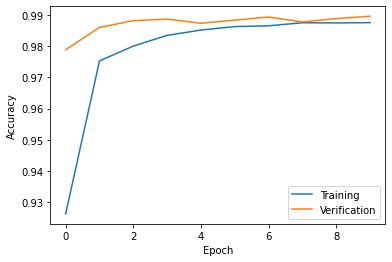

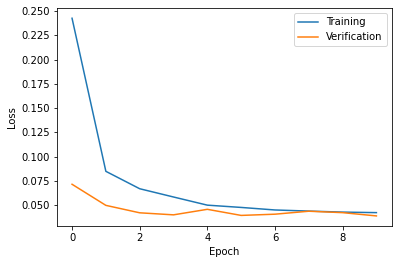

In [7]:
# GPU 연산

import time
import tensorflow as tf

###########################
# 학습 효과 분석
###########################
import matplotlib.pyplot as plt
###############################
# 분류 CNN 학습 및 테스트
###############################
def main():
    with tf.device('/device:GPU:1'):
        start_time = time.time()
        number_of_class = 10
        Nout = number_of_class

        batch_size = 128
        epochs = 10

        (X_train, Y_train), (X_test, Y_test) = Data_func()
        model = CNN(28,28,1,Nout)
                   #width, hight, color

        history = model.fit(X_train, Y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_split=0.2)

        score = model.evaluate(X_test, Y_test)
        print()
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        print()
        end_time = time.time()
        
        result_time = end_time-start_time
        print("GPU 연산 경과시간 : ",result_time)
        
        history = history.history

        """정확도 변화 추이  그래프"""
        plt.plot(history['acc'])
        plt.plot(history['val_acc'])
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Verification'], loc=0)
        plt.show()

        """Cost/Loss  변화 추이 그래프"""
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Verification'], loc=0)
        plt.show()
        
        
if __name__ == '__main__':
    main()
